# Week 4

## Task 1: Training perceptron with back propagation



The Simple Update Rule works well for simple perceptrons with binary step activation function. However, for more complex Neural Networks it is insufficient. In this task you will use perceptron with sigmoid activation function. From the lecture we know that for an instance $x=<x_1,\dots,x_k>$ the input of a perceptron is calculated as $in=x_1w_1 +\dots +x_kw_k +b$ where weights $w=\left( \begin{array}{c} w_1 \\ w_2 \\ \dots \\ w_k \end{array} \right)$ and bias $b$ are the parameters of the perceptron. Following this, the output of the perceptron is calculated as: $out=\frac{1}{1+e^{-in}}$.

In this task we will train the perceptron using the backpropagation and gradient descent algorithms. The pseudo code of the gradient descent algorithm is presented below:

Set weights $w$ and bias $b$ to random values.

For each $(x,y)$ in training set:
1. Pass $x$ through perceptron and calulate the outpu $out$
2. Calculate derivative of the error function $E$ with respect to each parameter
3. Update each weight according to the formula: $w_i = w_i - \alpha\frac{\sigma E}{\sigma w_i}$
4. Update the bias according to the formula: $b = b - \alpha\frac{\sigma E}{\sigma b}$

***
**T1.1 Loading dataset**

In this task we solve a simple regression problem using perceptron. The dataset `simpleregression` contains 2D data points, each assigned with an output value between 0 and 1. Familiarize yourself with the dataset.

The two first features are the input variables and the last feature is the target output.

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
data = np.loadtxt("simpleregression.txt")

#extract input and output values
x = data[:,:2]
y = data[:,2]
print(x.shape)

(100, 2)


We will split the data into training and testing sets.

In [50]:
#spliting data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

***
**T1.2 Implementing sigmoid activation function and derivative of the sigmoid function**

Given that the target values (values that we will be trying to predict) are between 0 and 1, we can use sigmoid activation function. In this task we implement two methods, which for a given input $v$ return the value of the sigmoid function and its derivative, respectively. From the lecture we know that the sigmoid function is define by the formula: $f(x)=\frac{1}{1+e^{-x}}$ and its derivative can be calculated as: $f'(x) = \frac{1}{1+e^{-x}}\times(1-\frac{1}{1+e^{-x}})$

In [51]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

In [52]:
def sigmoid_derivative(v):
    return sigmoid(v)*(1-sigmoid(v))

***
**T1.3 Implementing the forward pass**

We will start with implementing the forward pass (feedforward) of the perceptron. The matrix notation of the forward pass of an input $x=(x_1 \dots x_k)$ through the perceptron is formulated as follows:

$$ in = \left( \begin{array}{cc} x_1 & x_2 & \dots x_k \end{array}\right) \times
\left( \begin{array}{c} w_1 \\ w_2 \\ \dots \\ w_k \end{array} \right) + b$$
$$ out=\frac{1}{1+e^{-in}}$$

Where $w$ and $b$ are the weights (column vector of dimension $k$) and the bias (scalar), respectively and $out$ stands for the output of the perceptron.

We will start with initialising the weights and the bias with random values. Then we will implement the forward pass of the perceptron as $ out=\frac{1}{1+e^{-(xw+b)}}$.

In [53]:
#fixing seed of the random number generator, this will ensure that we always get the same result
np.random.seed(0) 

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(-1,1,1)
l = 0.05

#forward pass
for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)

***
**T1.4 Error calculation**

No we can calculate the error using the output $O$ and the target value $y$. We will use the squared error formula introduce during lectures:
$$E=\frac{1}{2}(y-out)^2$$


Note that since we are passing a single instance as input to the perceptron, both $out$ and $y$ are scalars.

In [54]:
np.random.seed(0)
#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(-1,1,1)
l = 0.05

for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)
    
    #error calculation
    error = (1/2)*(np.power((y_train[i]-out),2))

***
**T1.5 Implementing backpropagation**

The goal of backpropagation is to compute the following partial derivatives: $\frac{\sigma E}{\sigma w}$ and $\frac{\sigma E}{\sigma b}$.

Following the chain rule we know that:
\begin{equation*}
\frac{\sigma E}{\sigma w_i} = \frac{\sigma E}{\sigma out} \times \frac{\sigma out}{\sigma in} \times \frac{\sigma in}{\sigma w_i}
\end{equation*}

\begin{equation*}
\frac{\sigma E}{\sigma b} = \frac{\sigma E}{\sigma out} \times \frac{\sigma out}{\sigma in} \times \frac{\sigma in}{\sigma b}
\end{equation*}

The partial derivatives can then be calculated as:

$\frac{\sigma E}{\sigma out} = out-y$ - this is derivative of the squared error function and it is a scalar

$\frac{\sigma out}{\sigma in} = \underbrace{\frac{1}{1+e^{-in}}\times(1-\frac{1}{1+e^{-in}})}_{\text{this is derivative of the sigmoid function and it is a scalar}}$

$\frac{\sigma in}{\sigma w_i}= \underbrace{x_i}_{\text{ith input variable}}$

$\frac{\sigma E}{\sigma w_i} = \frac{\sigma E}{\sigma out}\times \frac{\sigma out}{\sigma in}\times \frac{\sigma in}{\sigma w_i}= (out-y)\times\frac{1}{1+e^{-in}}\times(1-\frac{1}{1+e^{-in}})\times x_i$

$\frac{\sigma E}{\sigma b}=\frac{\sigma E}{\sigma out}\times \frac{\sigma out}{\sigma in}\times \frac{\sigma in}{\sigma b} = (out-y)\times\frac{1}{1+e^{-in}}\times(1-\frac{1}{1+e^{-in}})\times\underbrace{1}_{\frac{\sigma in}{\sigma b}}$

Using matrix notation, we can calculate the derivatives of the error as:

$$\frac{\sigma E}{\sigma w} = x.T\times\frac{1}{1+e^{-in}}\times(1-\frac{1}{1+e^{-in}})\times(out-y)$$

$$\frac{\sigma E}{\sigma b} = \frac{1}{1+e^{-in}}\times(1-\frac{1}{1+e^{-in}})\times (out-y)$$

We transpose $x$ so that the derivative is in the same format as $w$. This makes the update step easier. Please go back to the lecture slides if you need more explanation.

Fill in the gaps for calculating the partial derivatives in the code below.

In [55]:
np.random.seed(0)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)
    
    #error calculation
    error = (1/2)*(np.power((y_train[i]-out),2))
    
    #backpropagation
    dEdOut = out - y_train[i]
    dOutdIn = sigmoid_derivative(x_train[i]@w + b)
    dIndW = x_train[i]
    dEdW = (dIndW.reshape(len(dIndW),1))*dEdOut*dOutdIn #transposing 1D arrya, we can only use x.T for 2D or higher array
    dEdB = dEdOut*dOutdIn*1

***
**T.1.6 Updating weights and bias**

Now that we calculated $\frac{\sigma E}{\sigma w}$ and $\frac{\sigma E}{\sigma b}$ we can update the parameters of the perceptron (i.e. weights and bias) following the Gradient Descent algorithm.

In [56]:
np.random.seed(0)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

for i in range(len(x_train)):
    #forward pass
    in_ = x_train[i]@w+b
    out = sigmoid(in_)
    
    #error calculation
    error = (1/2)*(np.power((y_train[i]-out),2))
    
    #backpropagation
    dEdOut = out - y_train[i]
    dOutdIn = sigmoid_derivative(x_train[i]@w + b)
    dIndW = x_train[i]
    dEdW = (dIndW.reshape(len(dIndW),1))*dEdOut*dOutdIn #transposing 1D arrya, we can only use T for 2D or higher array
    dEdB = dEdOut*dOutdIn*1
   
    #updating parameters of the model
    w = w - l*dEdW
    b = b - l*dEdB

***
**T1.7 Evaluation the Perceptron**

In order to see whether the model improved after the training, calculate predictions for the train and test datasets and evaluate the performance using the mean square error metric. Compare the error before and after training to see whether there is any improvement. You can copy the code from the previous cell and update it accordingly.

In [57]:
from sklearn import metrics

np.random.seed(0)

#initialising parameters
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05
print(w)
#testing the performance befor training
print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

for i in range(len(x_train)):
    in_ = x_train[i]@w+b
    out = sigmoid(in_)
    error = (1/2)*(np.power((y_train[i]-out),2))
    dEdOut = out - y_train[i]
    dOutdIn = sigmoid_derivative(np.dot(x_train[i],w) + b)
    dIndW = x_train[i]
    dEdW = (dIndW.reshape(len(dIndW),1))*dEdOut*dOutdIn #transposing 1D arrya, we can only use T for 2D or higher array
    dEdB = dEdOut*dOutdIn*1
    w = w - l*dEdW
    b = b - l*dEdB
print(w)
#testing the performance after training
print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

[[0.09762701]
 [0.43037873]]
Train error:  0.311777375609104
Test error:  0.3191802851880966
[[-0.03301192]
 [ 0.35304283]]
Train error:  0.2187886709519981
Test error:  0.227954585830263


***
**T1.8 Increasing batch size (Batch Gradient Descent Algorithm)**

Edit your BP code so that the parameters are updated after the entire training set is passed through the perceptron. In other words, the batch size is equals to the size of the training set, not one like in the previous case. You can follow the same procedure as previously but use matrix notation so that the gradient is calculated for all the instances from the training dataset simultaneously. The parameters should be updated using the average of gradients obtained for all instances in the training dataset.

Hints:

- the input is a matrix of shape [$n=$no if instances in train set, $k=$no of features] 
- the output of the perceptron is a column vector, make sure that the vector with target values $y$ is of the same format. You may need to re-shape it.

Using matrix notation, we can calculate the derivatives of the error as:

<br>

$$\frac{\sigma E}{\sigma w} = \frac{1}{n} \times \underbrace{X.T}_{\text{transposed input matrix}}@\left(\underbrace{\frac{1}{1+e^{-in}}\times(1-\frac{1}{1+e^{-in}})}_{\text{derivative of the sigmoid function} \\ \text{and it is a column vector of dimension $n$}}*\underbrace{(out-y)}_{\text{this is derivative of the squared error function} \\ \text{ and it is a column vector of dimension $n$.}}\right)$$

<br>

$$\frac{\sigma E}{\sigma b} = \frac{1}{n} \times  \underbrace{\overrightarrow{1}}_{\text{matrix [1,n]}} @ \left(\frac{1}{1+e^{-in}}\times(1-\frac{1}{1+e^{-in}})* (out-y)\right)$$

<br>

Note: $\times$ - scalar multiplication, $*$ - vector/matrix element wise multiplication, @ - matrix multiplication

You can copy the code from the previous cell and update it accordingly.

Evaluate the model and compare it with the previous results. What are your observations?


In [58]:
np.random.seed(0)

y=y.reshape(len(y),1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

#forward pass
in_ = x_train@w + b
out = sigmoid(in_)

#error calculation
error = (1/2)*(np.power((y_train-out),2)).mean()

#backpropagation
dEdOut = out - y_train
dOutdIn = sigmoid_derivative((x_train@w) + b) #dot will also work here
dIndW = x_train
dEdW = (1/x_train.shape[0])*(dIndW.T@(dEdOut*dOutdIn))
dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dEdOut*dOutdIn)

#updating weights
w -= l*dEdW
b -= l*dEdB
    
print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

Train error:  0.311777375609104
Test error:  0.3191802851880966
Train error:  0.31064282244688235
Test error:  0.3180659868199829


***
**T1.9 Increasing number of epochs**

One epoch means that all instances from the training set were passed through the network. Use a for loop in order to increase the number of epochs, i.e. to repeat the BP multiple times. You can test different number of epochs, you should get better results than before.

In [59]:
np.random.seed(0)
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

y=y.reshape(len(y),1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

for epoch in range(1000):
    in_ = x_train@w + b
    out = sigmoid(in_)
    error = (1/2)*(np.power((y_train-out),2)).mean()
    dEdOut = out - y_train
    dOutdIn = sigmoid_derivative((x_train@w) + b) #dot will also work here
    dIndW = x_train
    dEdW = (1/x_train.shape[0])*(dIndW.T@(dEdOut*dOutdIn))
    dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dEdOut*dOutdIn)
    w -= l*dEdW
    b -= l*dEdB

print('Train error: ', metrics.mean_squared_error(sigmoid(x_train@w+b),y_train))
print('Test error: ', metrics.mean_squared_error(sigmoid(x_test@w+b),y_test))

Train error:  0.311777375609104
Test error:  0.3191802851880966
Train error:  0.02760768858678833
Test error:  0.051475372644967765


***
**T.1.10 Visualizing the train/test error**

Visualize how the train/test error changes across the epochs using matplotlib. For this purpose you should create two empty lists $train=[]$ and $test=[]$. For each epoch calculate the train and test error and [append them to the lists](https://docs.python.org/2/tutorial/datastructures.html). Finally, once the perceptron is trained you will be able to visualize the error as follows:

z=np.arange(number of epochs)<br>
plt.plot(z,train,label="train",color='red')<br>
plt.plot(z,test,label="test",color='blue')<br>
plt.legend(loc='best')<br>
plt.show()

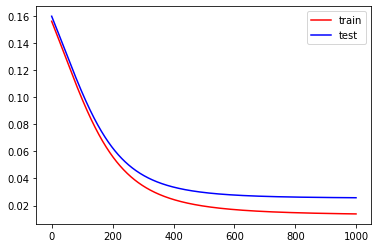

In [60]:
import matplotlib.pyplot as plt
np.random.seed(0)
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05

y=y.reshape(len(y),1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

train = []
test = []

for epoch in range(1000):
    in_ = x_train@w + b
    out = sigmoid(in_)
    error_train = 0.5*np.power((y_train-out),2)
    error_test = 0.5*np.power(sigmoid(x_test@w+b)-y_test,2)
    train.append(error_train.mean())
    test.append(error_test.mean())
    dEdOut = out - y_train
    dOutdIn = sigmoid_derivative((x_train@w) + b) #dot will also work here
    dIndW = x_train
    dEdW = (1/x_train.shape[0])*dIndW.T@(dEdOut*dOutdIn)
    dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dEdOut*dOutdIn)
    w -= l*dEdW
    b -= l*dEdB
    
z=np.arange(1000)
plt.plot(z,train,label="train",color='red')
plt.plot(z,test,label="test",color='blue')
plt.legend(loc='best')
plt.show()

## Task 2: Using Perceptron for binary classification

***
**T2.1 Implementing perceptron for classification**

Apply Batch Gradient Descent to train a perceptron model with the binary classification dataset uploaded below. You should use binary cross entropy loss function instead of MSE. Apart form the error, calculate the accuracy of the predictions made by the model on the train and test sets in each epoch. In order to convert outputs of the sigmoid function (floats between 0 and 1) into labels (0 or 1), you can apply a threshold of 0.5 (i.e. if the output is greater that 0.5 then the prediction is 1, otherwise the prediction is 0). There is a very useful numpy [method](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html) that can help with this. Visualize how the train/test error and accuracy change over the epochs. Use 1000 epochs.

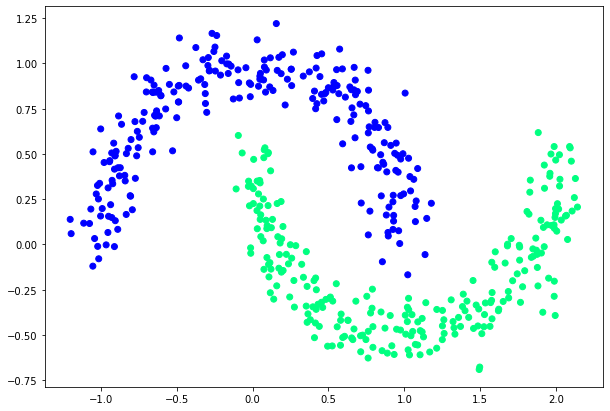

In [61]:
from sklearn import datasets

x, y = datasets.make_moons(500, noise=0.1)
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.winter)

y=y.reshape(len(y),1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [62]:
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

In [63]:
def crossEntrDeriv(o,y):
    return -(y/o - (1-y)/(1-o))

Final Accuracy:  0.83


C:\Users\DanielCollins\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\DanielCollins\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


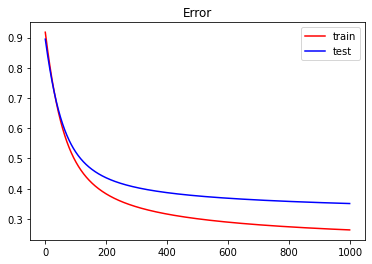

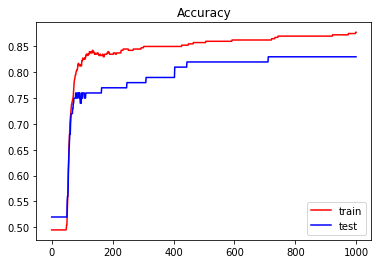

In [64]:
np.random.seed(0)
w = np.random.uniform(-1,1,[x_train.shape[1],1])
b = np.random.uniform(1)
l = 0.05


train_E = []
test_E = []
train_Acc = []
test_Acc = []
epochs = 1000

for epoch in range(epochs):
    #feedforward
    in_ = x_train@w + b
    out = sigmoid(in_)
    
    #error
    error_train = crossEntrop(out,y_train)
    error_test = crossEntrop(sigmoid(x_test@w+b),y_test)
    train_E.append(error_train.mean())
    test_E.append(error_test.mean())
    
    #accuracy
    predictions_train = np.where(out > 0.5, 1,0)
    prediction_test = np.where(sigmoid(x_test@w+b) > 0.5,1,0)
    train_Acc.append(metrics.accuracy_score(y_train,predictions_train))
    test_Acc.append(metrics.accuracy_score(y_test,prediction_test))
    
    #backpropagation
    dEdOut = crossEntrDeriv(out, y_train)
    dOutdIn = sigmoid_derivative((x_train@w) + b) #dot will also work here
    dIndW = x_train
    dEdW = (1/x_train.shape[0])*dIndW.T@(dEdOut*dOutdIn)
    dEdB = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dEdOut*dOutdIn)
    w -= l*dEdW
    b -= l*dEdB
print('Final Accuracy: ', metrics.accuracy_score(y_test,(np.where(sigmoid(x_test@w+b) > 0.5,1,0))))
    
z=np.arange(epochs)
f1=plt.figure(1)
plt.plot(z,train_E,label="train",color='red')
plt.plot(z,test_E,label="test",color='blue')
#plt.plot(z,test,label="test",color='blue')
plt.legend(loc='best')
plt.title('Error')
f1.show()
f2=plt.figure(2)
plt.plot(z,train_Acc,label="train",color='red')
plt.plot(z,test_Acc,label="test",color='blue')
#plt.plot(z,test,label="test",color='blue')
plt.legend(loc='best')
plt.title('Accuracy')
f2.show()

***
**T2.2 Evaluating model with cross validation**

Instead of splitting the dataset into train and test sets as in T2.1, use 5-cross validation. Report the average accuracy across the folds. 

In [65]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

test_Acc = []#for storing test error from each fold

for train_index, test_index in kf.split(x):
    #initializing weights
    np.random.seed(0)
    w = np.random.uniform(-1,1,[x.shape[1],1])
    b = np.random.uniform(1)
    l = 0.05
    
    for epoch in range(1000):
        #feedforward
        in_ = x[train_index]@w + b
        out = sigmoid(in_)

        #error
        error_train = crossEntrop(out,y[train_index])
        
        #backpropagation
        dEdOut = crossEntrDeriv(out, y[train_index])
        dOutdIn = sigmoid_derivative((x[train_index]@w) + b) #dot will also work here
        dIndW = x[train_index]
        dEdW = (1/x[train_index].shape[0])*dIndW.T@(dEdOut*dOutdIn)
        dEdB = (1/x[train_index].shape[0])*np.ones([1,len(x[train_index])])@(dEdOut*dOutdIn)
        w -= l*dEdW
        b -= l*dEdB
        
    #accuracy
    prediction_test = np.where(sigmoid(x[test_index]@w+b) > 0.5,1,0)
    test_Acc.append(metrics.accuracy_score(y[test_index],prediction_test))

print('Test Accuracy: ',sum(test_Acc)/len(test_Acc))

Test Accuracy:  0.8720000000000001


## Task 3: Solving Regression problem with Batch and Mini-batch GD

***

Implement Batch Gradient Descent and Mini-Batch Gradient Descent to train a perceptron with diabetes dataset from [sklearn](https://scikit-learn.org/stable/datasets/index.html). Use Leaky ReLu (you can also try ReLu) as activation function and 64 as the size of the mini-batch (try different sizes of mini-batch). Compare the errors obtained by both of the algorithms after 500 training epochs (try different numbers of epochs to see what happens). Check whether scaling the input data makes any difference.


In [66]:
from sklearn import preprocessing

x, y = datasets.load_diabetes(return_X_y=True)
y=y.reshape(len(y),1)
#scaling the input data
x = preprocessing.MinMaxScaler().fit_transform(x)

Activation Functions and their derivatives

In [67]:
def LReLU(x):
    return np.where(x > 0, x, x * 0.01)

def dLReLU(x):
    return np.where(x > 0, 1, 0.01)
   

Batch Gradient Descent

Error after training:  1535.6951828845483


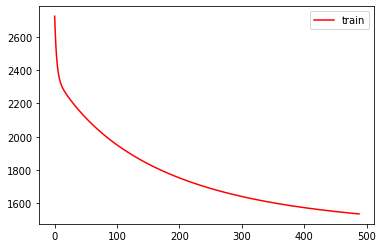

In [68]:
 #initializing weights
np.random.seed(0)
w = np.random.uniform(-1,1,[x.shape[1],1])
b = np.random.uniform(1)
l = 0.05

error = []

for epoch in range(500):
    #feed forward
    in_ = x@w + b
    out = LReLU(in_)

    #error
    error_train = 0.5*np.power((y-out),2)
    if epoch > 10: #skipping the first few epochs so the error on the graph is better visible
        error.append(error_train.mean())
    
    #backpropagation
    dEdOut = out - y
    dOutdIn = dLReLU(in_) 
    dIndW = x
    dEdW = (1/x.shape[0])*dIndW.T@(dEdOut*dOutdIn)
    dEdB = (1/x.shape[0])*np.ones([1,len(x)])@(dEdOut*dOutdIn)
    w -= l*dEdW
    b -= l*dEdB
    
print('Error after training: ',error[len(error)-1]) 
    
z=np.arange(len(error))
plt.plot(z,error,label="train",color='red')
plt.legend(loc='best')
plt.show()

Mini-Batch Gradient descent

Error after training:  1439.5965965933501


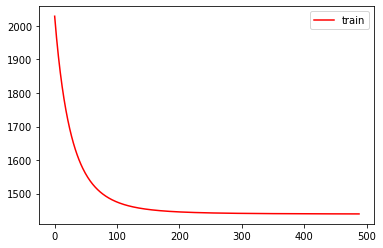

In [69]:
minibatch_size = 64

#initializing weights
np.random.seed(0)
w = np.random.uniform(-1,1,[x.shape[1],1])
b = np.random.uniform(1)
l = 0.05

error = []

for epoch in range(500):
    for i in range(0, x.shape[0], minibatch_size):
        x_mini = x[i:i + minibatch_size-1,:]
        y_mini = y[i:i + minibatch_size-1,:]
        
         #feed forward
        in_ = x_mini@w + b
        out = LReLU(in_)

        #error
        error_train = 0.5*np.power((y_mini-out),2)

        #backpropagation
        dEdOut = out - y_mini
        dOutdIn = dLReLU(in_) 
        dIndW = x_mini
        dEdW = (1/x_mini.shape[0])*dIndW.T@(dEdOut*dOutdIn)
        dEdB = (1/x_mini.shape[0])*np.ones([1,len(x_mini)])@(dEdOut*dOutdIn)
        w -= l*dEdW
        b -= l*dEdB
    
    if epoch > 10:
        error.append(0.5*np.power((LReLU(x@w + b)-y),2).mean())

print('Error after training: ',error[len(error)-1])
        
z=np.arange(len(error))
plt.plot(z,error,label="train",color='red')
plt.legend(loc='best')
plt.show()